#  Sentiment Analysis; optimism-pessimism identification

## Data exploration

In [ ]:
import pandas as pd

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade transformers
!pip install --upgrade tf_keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 21.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

In [ ]:
import pandas as pd
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [ ]:
IMDB_DATASET_PATH = '/home/imdb_dataset.csv'
df = pd.read_csv(IMDB_DATASET_PATH, on_bad_lines='skip')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
rows, columns = df.shape[0], df.shape[1]
print(f"Rows = {rows}, Columns = {columns}")

num_duplicates=df.duplicated().sum()
print(f"Duplicates = {num_duplicates}")
# dropping the duplicates
df.drop_duplicates(inplace=True)

rows, columns = df.shape[0], df.shape[1]
print(f"Rows = {rows}, Columns = {columns}")

num_nan_values = df.isna().sum().sum()
print(f"NaN values = {num_nan_values}")

Rows = 40000, Columns = 2
Duplicates = 277
Rows = 39723, Columns = 2
NaN values = 0


In [ ]:
df['word_count'] = df['text'].apply(lambda review: len(review.split()))
df.head()

,text,label,word_count
0,I grew up (b. 1965) watching and loving the Th...,0,151
1,"When I put this movie in my DVD player, and sa...",0,326
2,Why do people who do not know what a particula...,0,184
3,Even though I have great interest in Biblical ...,0,69
4,Im a die hard Dads Army fan and nothing will e...,1,178


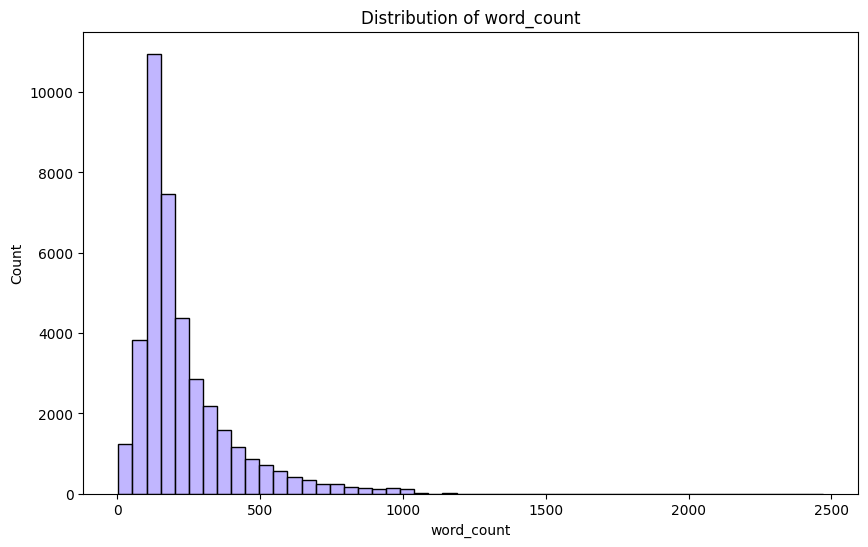

In [ ]:
# Word counts distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='word_count', bins=50, color='#ad9eff')
plt.title(f"Distribution of word_count")
plt.show()

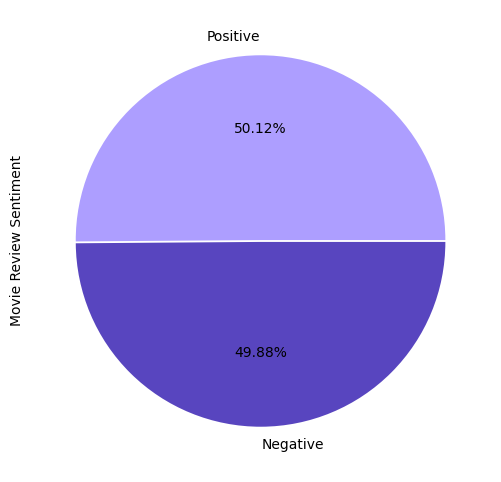

In [ ]:
# Distribution of target
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.pie(
    df['label'].value_counts(),
    labels=['Positive', 'Negative'],
    autopct='%.2f%%',
    explode=[0.005, 0.005],
    colors=['#ad9eff', '#5845bf']);
plt.ylabel('Movie Review Sentiment');
plt.show()


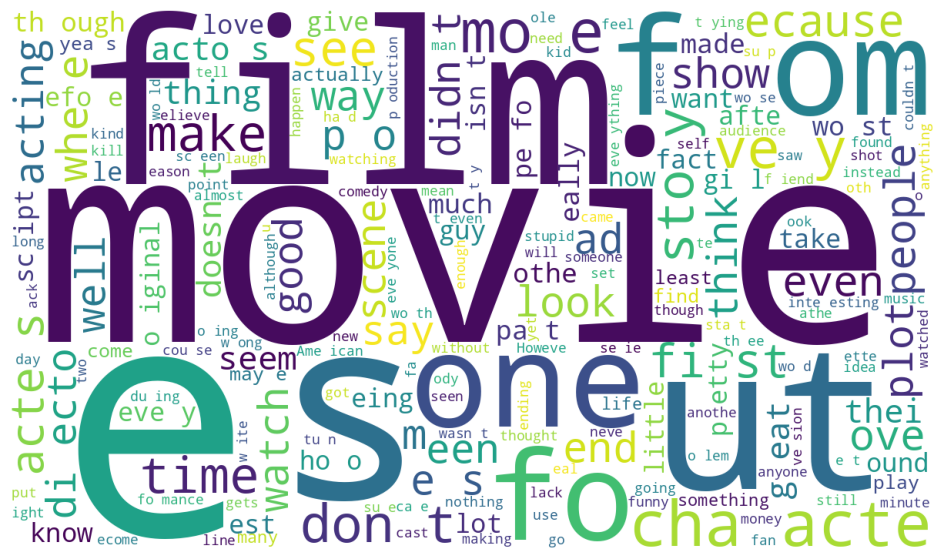

In [ ]:
# Most common words in Negative ratings
import re
from wordcloud import WordCloud, STOPWORDS

negative_reviews_list = df.loc[df['label'] == 0, 'text'].tolist()
reviews = ""
for review in negative_reviews_list:
    review = re.sub("[<br />]", " ", review)
    review = re.sub("[^A-Za-z0-9]+", " ", review)
    reviews += review

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    width = 1200,
    height = 700,
    background_color ='white',
    stopwords = stopwords,
    min_font_size = 10
).generate(reviews)

# plot the WordCloud image
plt.figure(figsize = (12, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


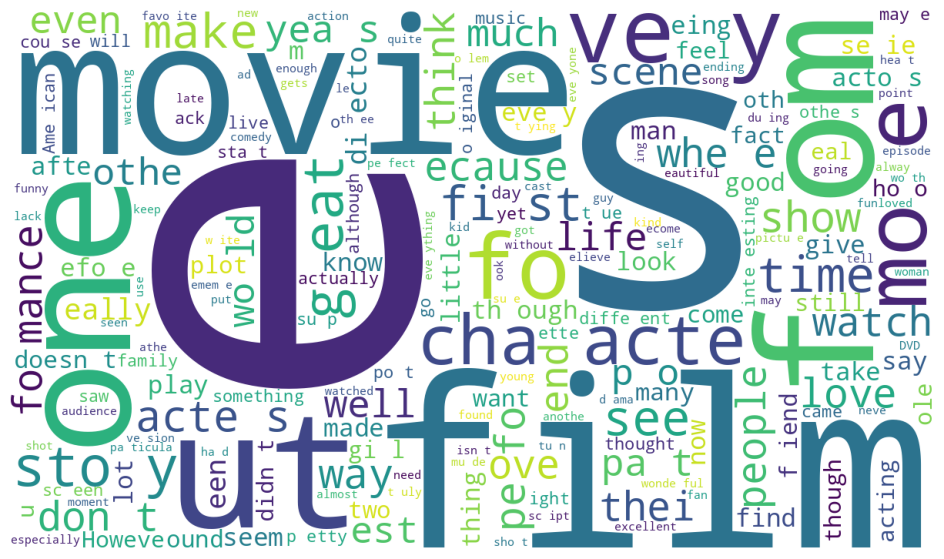

In [ ]:
# Most common words in Positive ratings
import re
from wordcloud import WordCloud, STOPWORDS

positive_reviews_list = df.loc[df['label'] == 1, 'text'].tolist()
reviews = ""
for review in positive_reviews_list:
    review = re.sub("[<br />]", " ", review)
    review = re.sub("[^A-Za-z0-9]+", " ", review)
    reviews += review

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    width = 1200,
    height = 700,
    background_color ='white',
    stopwords = stopwords,
    min_font_size = 10
).generate(reviews)

# plot the WordCloud image
plt.figure(figsize = (12, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
from collections import Counter

xtrain, xtest, ytrain, ytest = train_test_split(
    df['text'].to_numpy(),
    df['label'].to_numpy(),
    test_size=0.2,
    stratify=df['label'].to_numpy()
)

# check the count of different labels in the train and test set
Counter(ytrain), Counter(ytest)

(Counter({0: 15852, 1: 15926}), Counter({0: 3963, 1: 3982}))

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import timeit

def binary_clf_evaluation(y_true, y_pred, time_taken):
    '''Calculates accuracy, precision, recall and f1_score'''
    model_accuracy = accuracy_score(y_true, y_pred)

    model_precision, model_recall, model_f1_score, _ = (
        precision_recall_fscore_support(y_true, y_pred, average='weighted')
    )

    results={'accuracy': model_accuracy,
             'precision': model_precision,
             'recall': model_recall,
             'f1_score': model_f1_score,
             'time/instance': time_taken
            }
    return results

def display_results(results):
    for key, value in results.items():
      if key == "accuracy":
        print(f"accuracy: {value*100:.2f}%")
      elif key == 'time/instance':
         print(f"time/instance: {value:.4f} seconds")
      else:
        print(f"{key}:  {value:.2f}")

## 0. Naive Bayes (MultinomialNB) - baseline accuracy

In [ ]:
import timeit
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer


# define the model
model_0 = Pipeline([
    ('tf-idf', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])

model_0.fit(xtrain, ytrain)

start_time = timeit.default_timer()
model_0_pred = model_0.predict(xtest)
end_time = timeit.default_timer()
time_taken_per_instance = (end_time - start_time)/len(xtest)
model_0_results = binary_clf_evaluation(ytest, model_0_pred, time_taken_per_instance)
display_results(model_0_results)

accuracy: 85.84%
precision:  0.86
recall:  0.86
f1_score:  0.86
time/instance: 0.0002 seconds


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision


# convert data to databatches
BATCH_SIZE = 32
EPOCHS = 5
training_dataset = tf.data.Dataset.from_tensor_slices((xtrain, ytrain)).batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((xtest, ytest)).batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# tokenization and vectorization

max_vocab_length = 10000
# the words which are not amongst the top 10000 words will be represented using <oov> tag

selected_news_length = round(np.percentile(([len(x.split()) for x in xtrain]), 95))
print(selected_news_length)
# this will be able to incoorporate 95 % of the entire instances without truncating the end part

textVectorizer=layers.TextVectorization(
    max_tokens=max_vocab_length,
    output_mode='int',
    output_sequence_length=selected_news_length
);

textVectorizer.adapt(xtrain)
# shape of an instance after textVectorization
print(textVectorizer(xtrain[0]).shape)

# Embedding layer
embedding = layers.Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    input_length=selected_news_length
)
# here each word will be represented using a 128 dim dense vector

embedding(textVectorizer(xtrain[0])).shape

590
(590,)


TensorShape([590, 128])

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(1, len(history.history['loss']) + 1)
    plt.figure(figsize=(10, 7))
    # plot loss data
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label="training_loss", color='#ad9eff')
    plt.plot(epochs, val_loss, label="validation_loss", color='#5845bf')
    plt.title("Loss curves", size=15)
    plt.xlabel('epochs', size=15)
    plt.ylabel('loss', size=15)
    plt.legend(fontsize=13)

    # plot accuracy data
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label="training_acc", color='#ad9eff')
    plt.plot(epochs, val_accuracy, label="validation_acc", color='#5845bf')
    plt.title("Accuracy curves", size=15)
    plt.xlabel('epochs', size=15)
    plt.ylabel('Accuracy', size=15)
    plt.tight_layout()
    plt.legend(fontsize=13)
    plt.show()

## 1. Feed Forword Neural Network

In [ ]:
# model
mixed_precision.set_global_policy('mixed_float16')
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = textVectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.15)(x)
outputs = layers.Dense(1, activation='sigmoid', dtype=tf.float32)(x)
model_1 = keras.models.Model(inputs, outputs, name="model_1")


model_1.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)
model_1_history = model_1.fit(
    training_dataset,
    steps_per_epoch=len(training_dataset),
    epochs=EPOCHS,
    validation_data=test_dataset,
    validation_steps=len(test_dataset)
)


Epoch 1/5
1000/1000 [==============================] - 68s 66ms/step - loss: 0.5812 - accuracy: 0.7434 - val_loss: 0.4423 - val_accuracy: 0.8487
Epoch 2/5
1000/1000 [==============================] - 60s 60ms/step - loss: 0.3614 - accuracy: 0.8705 - val_loss: 0.3295 - val_accuracy: 0.8766
Epoch 3/5
1000/1000 [==============================] - 57s 57ms/step - loss: 0.2838 - accuracy: 0.8947 - val_loss: 0.2937 - val_accuracy: 0.8874
Epoch 4/5
1000/1000 [==============================] - 55s 55ms/step - loss: 0.2461 - accuracy: 0.9074 - val_loss: 0.2774 - val_accuracy: 0.8944
Epoch 5/5
1000/1000 [==============================] - 57s 57ms/step - loss: 0.2204 - accuracy: 0.9166 - val_loss: 0.2697 - val_accuracy: 0.8971


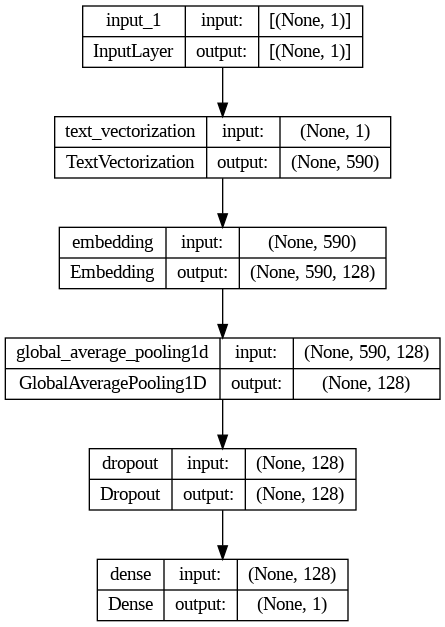

In [ ]:
keras.utils.plot_model(model_1,show_shapes=True)

In [ ]:
start_time = timeit.default_timer()
model_1_pred_prob = model_1.predict(test_dataset)
print(model_1_pred_prob)
model_1_pred = tf.squeeze(tf.round(model_1_pred_prob))
print(model_1_pred)
end_time = timeit.default_timer()
time_taken_per_instance = (end_time - start_time)/len(xtest)
model_1_results = binary_clf_evaluation(ytest, model_1_pred, time_taken_per_instance)
display_results(model_1_results)

250/250 [==============================] - 5s 17ms/step
[[0.6570214 ]
 [0.93238056]
 [0.07806116]
 ...
 [0.9646895 ]
 [0.11637133]
 [0.13136946]]
tf.Tensor([1. 1. 0. ... 1. 0. 0.], shape=(8000,), dtype=float32)
accuracy: 89.71%
precision:  0.90
recall:  0.90
f1_score:  0.90
time/instance: 0.0006 seconds


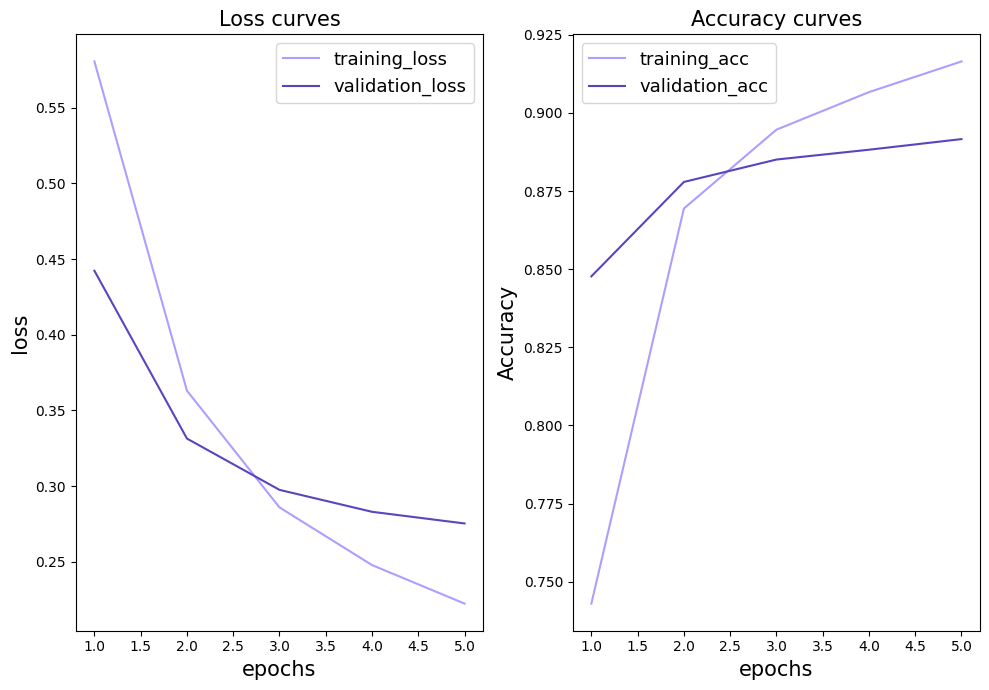

In [ ]:
plot_loss_curves(model_1_history)

## 2. Simple Recurrent Neural Network (RNN)

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = textVectorizer(inputs)
x = embedding(x)
x = layers.SimpleRNN(32)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation='sigmoid', dtype=tf.float32)(x)
model_2 = keras.models.Model(inputs, outputs, name="model_2")

model_2.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_2_history=model_2.fit(
    training_dataset,
    steps_per_epoch=len(training_dataset),
    epochs=EPOCHS,
    validation_data=test_dataset,
    validation_steps=len(test_dataset)
)

Epoch 1/5
994/994 [==============================] - 178s 173ms/step - loss: 0.6996 - accuracy: 0.5054 - val_loss: 0.6933 - val_accuracy: 0.5012
Epoch 2/5
994/994 [==============================] - 168s 169ms/step - loss: 0.6874 - accuracy: 0.5156 - val_loss: 0.6946 - val_accuracy: 0.5169
Epoch 3/5
994/994 [==============================] - 166s 167ms/step - loss: 0.6805 - accuracy: 0.5237 - val_loss: 0.6964 - val_accuracy: 0.5008
Epoch 4/5
994/994 [==============================] - 167s 168ms/step - loss: 0.6669 - accuracy: 0.5297 - val_loss: 0.7020 - val_accuracy: 0.5009
Epoch 5/5
994/994 [==============================] - 170s 171ms/step - loss: 0.6992 - accuracy: 0.5116 - val_loss: 0.6942 - val_accuracy: 0.4989


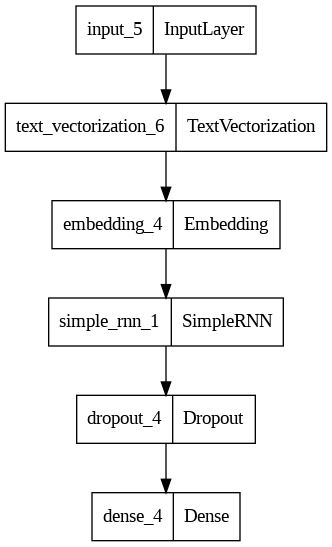

In [ ]:
keras.utils.plot_model(model_2)

In [ ]:
start_time=timeit.default_timer()
model_2_pred_prob = model_2.predict(test_dataset)
model_2_pred = tf.squeeze(tf.round(model_2_pred_prob))
end_time = timeit.default_timer()
time_taken_per_instance = (end_time-start_time)/len(xtest)
model_2_results = binary_clf_evaluation(ytest,model_2_pred,time_taken_per_instance)
display_results(model_2_results)

249/249 [==============================] - 9s 37ms/step
accuracy: 49.89%
precision:  0.48
recall:  0.50
f1_score:  0.35
time/instance: 0.0013 seconds


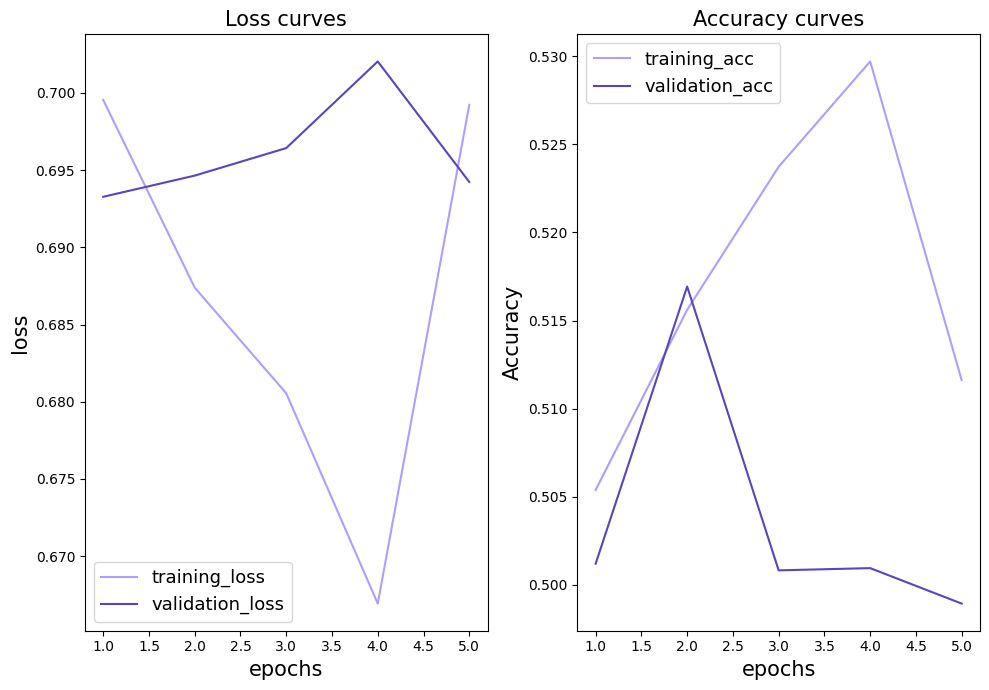

In [ ]:
plot_loss_curves(model_2_history)

## 3. Long Short Term Memory (LSTM) Networks

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = textVectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64)(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(1, activation='sigmoid', dtype=tf.float32)(x)
model_3 = keras.models.Model(inputs, outputs, name="model_3")

model_3.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_3_history=model_3.fit(
    training_dataset,
    steps_per_epoch=len(training_dataset),
    epochs=EPOCHS,
    validation_data=test_dataset,
    validation_steps=len(test_dataset)
)

Epoch 1/5
994/994 [==============================] - 499s 499ms/step - loss: 0.6935 - accuracy: 0.5002 - val_loss: 0.6928 - val_accuracy: 0.5014
Epoch 2/5
994/994 [==============================] - 496s 499ms/step - loss: 0.6897 - accuracy: 0.5047 - val_loss: 0.6938 - val_accuracy: 0.5033
Epoch 3/5
994/994 [==============================] - 484s 487ms/step - loss: 0.6734 - accuracy: 0.5163 - val_loss: 0.7081 - val_accuracy: 0.5046
Epoch 4/5
994/994 [==============================] - 486s 489ms/step - loss: 0.6629 - accuracy: 0.5214 - val_loss: 0.7267 - val_accuracy: 0.5031
Epoch 5/5
994/994 [==============================] - 485s 488ms/step - loss: 0.6594 - accuracy: 0.5234 - val_loss: 0.7379 - val_accuracy: 0.5008


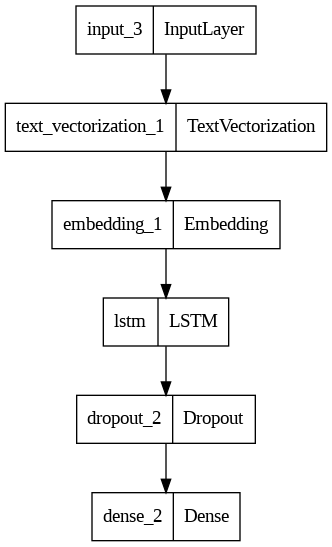

In [ ]:
keras.utils.plot_model(model_3)

In [ ]:
start_time = timeit.default_timer()
model_3_pred_prob = model_3.predict(test_dataset)
model_3_pred = tf.squeeze(tf.round(model_3_pred_prob))
end_time = timeit.default_timer()
time_taken_per_instance = (end_time-start_time)/len(xtest)
model_3_results = binary_clf_evaluation(ytest, model_3_pred, time_taken_per_instance)
display_results(model_3_results)

249/249 [==============================] - 29s 113ms/step
accuracy: 50.08%
precision:  0.50
recall:  0.50
f1_score:  0.36
time/instance: 0.0037 seconds


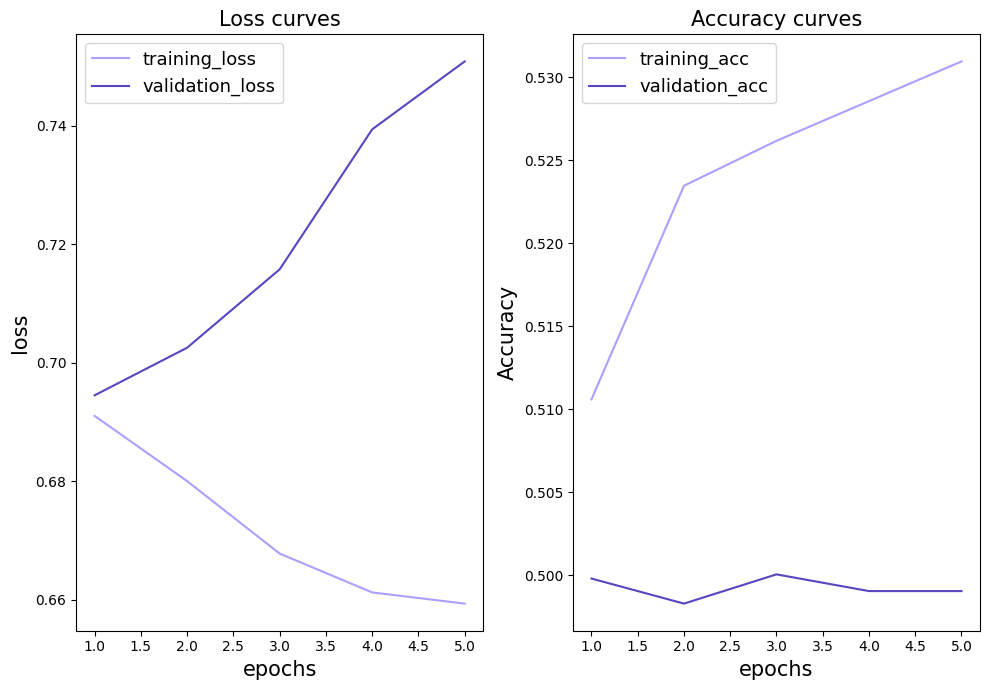

In [ ]:
plot_loss_curves(model_3_history)

## 4. Stacked Long Short-Term Memory Networks

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = textVectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.Dropout(0.2)(x)
x = layers.LSTM(32)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation='sigmoid', dtype=tf.float32)(x)
model_4 = keras.models.Model(inputs, outputs, name="model_4")

model_4.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_4_history=model_4.fit(
    training_dataset,
    steps_per_epoch=len(training_dataset),
    epochs=EPOCHS,
    validation_data=test_dataset,
    validation_steps=len(test_dataset)
)

Epoch 1/5
994/994 [==============================] - 662s 662ms/step - loss: 0.6706 - accuracy: 0.5265 - val_loss: 0.7406 - val_accuracy: 0.5007
Epoch 2/5
994/994 [==============================] - 659s 663ms/step - loss: 0.6610 - accuracy: 0.5295 - val_loss: 0.7628 - val_accuracy: 0.4993
Epoch 3/5
994/994 [==============================] - 649s 653ms/step - loss: 0.6581 - accuracy: 0.5314 - val_loss: 0.7644 - val_accuracy: 0.4993
Epoch 4/5
994/994 [==============================] - 651s 655ms/step - loss: 0.6575 - accuracy: 0.5323 - val_loss: 0.7759 - val_accuracy: 0.4987
Epoch 5/5
994/994 [==============================] - 664s 668ms/step - loss: 0.6568 - accuracy: 0.5334 - val_loss: 0.7738 - val_accuracy: 0.4992


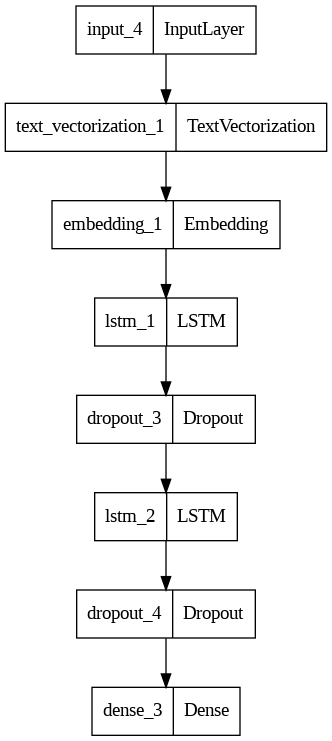

In [ ]:
keras.utils.plot_model(model_4)

In [ ]:
start_time = timeit.default_timer()
model_4_pred_prob = model_4.predict(test_dataset)
model_4_pred = tf.squeeze(tf.round(model_4_pred_prob))
end_time = timeit.default_timer()
time_taken_per_instance = (end_time-start_time)/len(xtest)
model_4_results = binary_clf_evaluation(ytest, model_4_pred, time_taken_per_instance)
display_results(model_4_results)

249/249 [==============================] - 37s 146ms/step
accuracy: 49.92%
precision:  0.49
recall:  0.50
f1_score:  0.36
time/instance: 0.0053 seconds


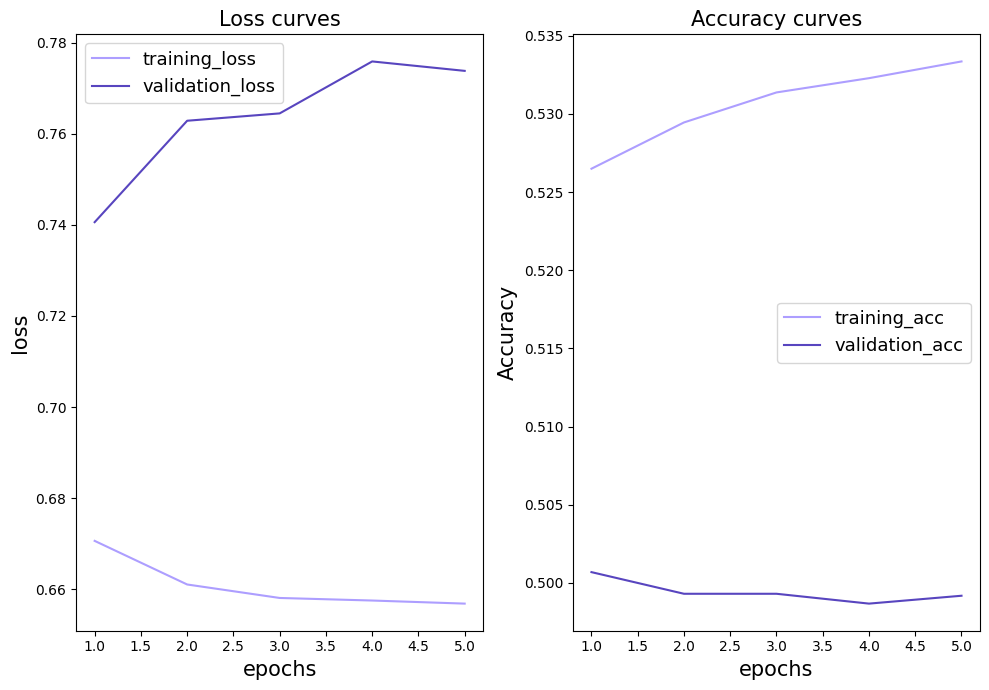

In [ ]:
plot_loss_curves(model_4_history)

## 5. Universal Sentance Encoder (USE)

In [ ]:
import tensorflow_hub as hub

pretained_embedding = hub.KerasLayer(
  'https://tfhub.dev/google/universal-sentence-encoder/4',
  trainable=False,
  input_shape=[],
  dtype=tf.string,
  name="USE"
)
model_5 = keras.Sequential([
    pretained_embedding,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid', dtype=tf.float32)
])

model_5.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_5_history=model_5.fit(
    training_dataset,
    steps_per_epoch=len(training_dataset),
    epochs=EPOCHS,
    validation_data=test_dataset,
    validation_steps=len(test_dataset)
)

Epoch 1/5
994/994 [==============================] - 78s 75ms/step - loss: 0.3650 - accuracy: 0.8431 - val_loss: 0.3213 - val_accuracy: 0.8589
Epoch 2/5
994/994 [==============================] - 74s 74ms/step - loss: 0.3249 - accuracy: 0.8581 - val_loss: 0.3185 - val_accuracy: 0.8613
Epoch 3/5
994/994 [==============================] - 73s 73ms/step - loss: 0.3210 - accuracy: 0.8598 - val_loss: 0.3168 - val_accuracy: 0.8626
Epoch 4/5
994/994 [==============================] - 72s 73ms/step - loss: 0.3174 - accuracy: 0.8614 - val_loss: 0.3152 - val_accuracy: 0.8627
Epoch 5/5
994/994 [==============================] - 74s 75ms/step - loss: 0.3136 - accuracy: 0.8629 - val_loss: 0.3139 - val_accuracy: 0.8631


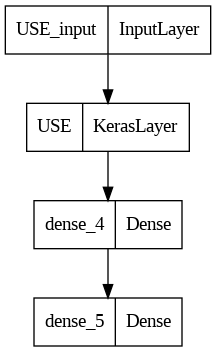

In [ ]:
keras.utils.plot_model(model_5)

In [ ]:
start_time = timeit.default_timer()
model_5_pred_prob = model_5.predict(test_dataset)
model_5_pred = tf.squeeze(tf.round(model_5_pred_prob))
end_time = timeit.default_timer()
time_taken_per_instance = (end_time-start_time)/len(xtest)
model_5_results = binary_clf_evaluation(ytest, model_5_pred, time_taken_per_instance)
display_results(model_5_results)

249/249 [==============================] - 20s 78ms/step
accuracy: 86.65%
precision:  0.87
recall:  0.87
f1_score:  0.87
time/instance: 0.0025 seconds


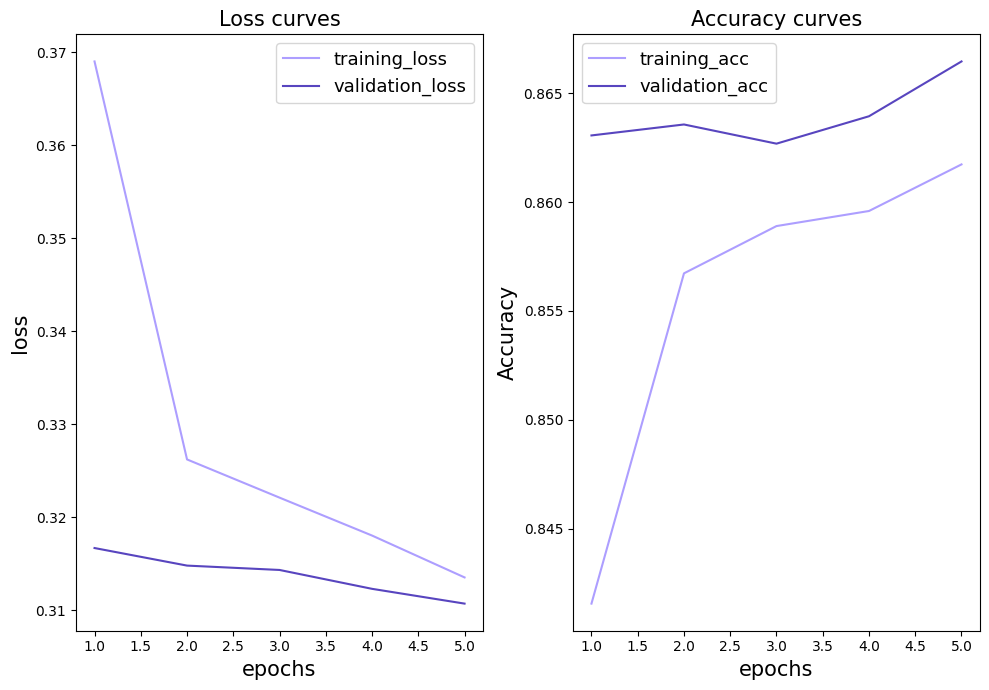

In [ ]:
plot_loss_curves(model_5_history)

In [ ]:
# Fine tunning
pretained_embedding.trainable = True

model_5.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True, verbose=2)
reduce_lr_cb = keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=2, min_delta=0.001, min_lr=1e-7, verbose=2)


model_5_history_fn = model_5.fit(
    training_dataset,
    epochs=5,
    steps_per_epoch=len(training_dataset),
    initial_epoch=4,
    validation_data=test_dataset,
    validation_steps=len(test_dataset),
    callbacks=[early_stopping_cb, reduce_lr_cb]
)

Epoch 5/5
994/994 [==============================] - 6287s 6s/step - loss: 0.2935 - accuracy: 0.8726 - val_loss: 0.2800 - val_accuracy: 0.8822 - lr: 1.0000e-04


In [ ]:
plot_loss_curves(model_5_history_fn)

In [ ]:
start_time = timeit.default_timer()
model_5_pred_prob_fn = model_5.predict(test_dataset)
model_5_pred_fn = tf.squeeze(tf.round(model_5_pred_prob_fn))
end_time = timeit.default_timer()
time_taken_per_instance = (end_time-start_time)/len(xtest)
model_5_results_fn = binary_clf_evaluation(ytest, model_5_pred_fn, time_taken_per_instance)
display_results(model_5_results_fn)

## 6. Transformers, fine tunning pretrained model from HuggingFace Model Hub

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from datasets import load_dataset

data = load_dataset('csv', data_files=IMDB_DATASET_PATH)

In [ ]:
from transformers import AutoTokenizer,DataCollatorWithPadding

def lowercase_text(example):
    return{'text': example['text'].lower()}

# convert to lowercase
data = data.map(lowercase_text)

# tokenization
checkpoint = 'bert-base-uncased'

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# defining the tokenization function
def tokenize_function(example):
    return tokenizer(example['text'], truncation=True)

tokenized_dataset = data.map(tokenize_function, batched=True)

# policy to be used while batching
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors='tf')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# split data into train and test
tokenized_splitted_dataset = tokenized_dataset['train'].train_test_split(test_size=0.2)
test_set_length = len(tokenized_splitted_dataset['test']['label'])
tokenized_splitted_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 32000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 8000
    })
})

In [ ]:
from transformers import AutoTokenizer,DataCollatorWithPadding
from transformers import TFAutoModelForSequenceClassification
from tensorflow.keras.optimizers.schedules import PolynomialDecay

# convert data into data batches
tf_train_dataset = tokenized_splitted_dataset["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["label"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
).prefetch(tf.data.AUTOTUNE)

tf_validation_dataset = tokenized_splitted_dataset["test"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["label"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8,
).prefetch(tf.data.AUTOTUNE)

# build the model
model_6 = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=1)

epochs =  3
mini_batches = int(0.2 * len(tf_train_dataset))
num_steps = epochs * mini_batches
learning_rate_schedule=PolynomialDecay(
    initial_learning_rate=5e-5,
    decay_steps=num_steps,
    end_learning_rate=0.0,
)

model_6.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate_schedule),
    metrics=['accuracy']
)

model_6_history=model_6.fit(
    tf_train_dataset,
    steps_per_epoch=int(0.2 * len(tf_train_dataset)),
    epochs=epochs,
    validation_data=tf_validation_dataset
)

start_time=timeit.default_timer()
model_6_pred_logits=model_6.predict(tf_validation_dataset)
model_6_pred=tf.round(tf.nn.sigmoid(model_6_pred_logits['logits']))
end_time=timeit.default_timer()
time_taken_per_instance=(end_time-start_time)/test_set_lenght
model_6_results=binary_clf_evaluation(tokenized_splitted_dataset['test']['label'], model_6_pred,time_taken_per_instance)
display_results(model_6_results)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:410: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inferen

Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
739/800 [==========================>...] - ETA: 51:28 - loss: 0.3366 - accuracy: 0.8435

In [ ]:
plot_loss_curves(model_6_history)

## Logistic Regression

In [ ]:
!pip install num2words
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 3.3 MB/s eta 0:00:00


In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from num2words import num2words
import matplotlib.pyplot as plt
import re
import nltk
import emoji
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stop_words_nltk = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
vectorizer = TfidfVectorizer()

def process_text (text) :
  text = text.lower()
  text = emoji.demojize(text)
  text = re.sub('http\S+', "", text)
  text = re.sub('#(\S+)', r'\1', text)
  text = re.sub('@(\S+)', r'\1', text)
  text = re.sub('[^\w\s]', '', text)
  return text


def process_tokens (tokens) :
  tokens = [word for word in tokens if word not in stop_words_nltk]
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  tokens = [num2words(word) if word.isdigit() else word for word in tokens]
  return tokens


def preprocess (text) :
  text = process_text(text)
  tokens = word_tokenize(text)
  tokens = process_tokens(tokens)

  return " ".join(tokens)


df = pd.read_csv('/content/sample_data/Train.csv', on_bad_lines='skip')
df['processed_text'] = df['reviews'].apply(preprocess)
X = vectorizer.fit_transform(df['reviews'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

accuracy = classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

processed_sentence = preprocess("My homework is too big")
X_sentence = vectorizer.transform([processed_sentence])
predicted_label = classifier.predict(X_sentence)
prediction_text = "positive" if predicted_label == 1 else "negative"

print("Predicted label:", prediction_text)


Accuracy: 0.9199076902192357
Predicted label: negative


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Summary

In [ ]:
data = {
    'model': [
        'model_0', 'model_1', 'model_2', 'model_3',
        'model_4', 'model_5', 'model_5_fn', 'model_6'
    ],
    'accuracy': [
        0.863184, 0.890749, 0.497042, 0.753807,
        0.836501, 0.477281, 0.882568, 0.926875
    ],
    'precision': [
        0.863555, 0.891775, 0.497025, 0.754090,
        0.845098, 0.466603, 0.886573, 0.927327
    ],
    'recall': [
        0.863184, 0.890749, 0.497042, 0.753807,
        0.836501, 0.477281, 0.882568, 0.926875
    ],
    'f1_score': [
        0.863156, 0.890685, 0.497009, 0.753753,
        0.835438, 0.428799, 0.882279, 0.926852
    ],
    'time/instance': [
        0.000227, 0.000164, 0.003093, 0.000639,
        0.001191, 0.001475, 0.001590, 0.023274
    ]
}
results = pd.DataFrame(data)
results

In [ ]:
results.sort_values(by='f1_score',ascending=False)['f1_score'].plot(kind='bar',figsize=(14,6),color='#ad9eff');

In [ ]:
results.sort_values(by='time/instance',ascending=True)['time/instance'].plot(kind='bar',figsize=(14,6),color='#ad9eff');

In [ ]:
# model f1 score vs time taken per prediction
plt.figure(figsize=(18,7))
sns.scatterplot(data=results, x='f1_score', y='time/instance', s=200, color='#ad9eff', style=results.index);
plt.legend(bbox_to_anchor=(1.0,1.0));